In [5]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [9]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

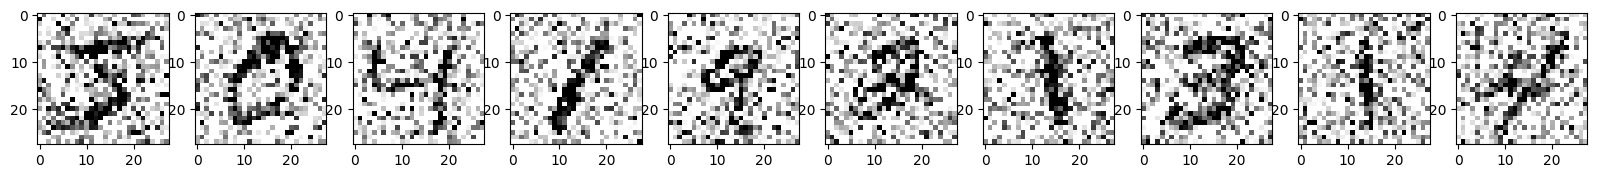

In [15]:
plt.figure(figsize=(20, 2))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='binary')
    # plt.axis('off')
plt.show()

In [17]:
SIZE = 28

In [18]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

c:\Users\omvis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.8019 - loss: 0.0662 - val_accuracy: 0.7977 - val_loss: 0.0400
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.8007 - loss: 0.0375 - val_accuracy: 0.8028 - val_loss: 0.0318
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.8037 - loss: 0.0315 - val_accuracy: 0.8041 - val_loss: 0.0288
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.8053 - loss: 0.0288 - val_accuracy: 0.8050 - val_loss: 0.0271
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.8058 - loss: 0.0272 - val_accuracy: 0.8055 - val_loss: 0.0260
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.8067 - loss: 0.0262 - val_accuracy: 0.8068 - val_loss: 0.0252
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.8073 - loss: 0.0253 - val_accuracy: 0.8068 - val_loss: 0.0245
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.8081 - loss: 0.0245 -

In [21]:
model.evaluate(x_test_noisy, x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8131 - loss: 0.0232


[0.02307465486228466, 0.805914044380188]

In [27]:
model.save('denoising_autoencoder_mnist.keras')

In [28]:
no_noise_img = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


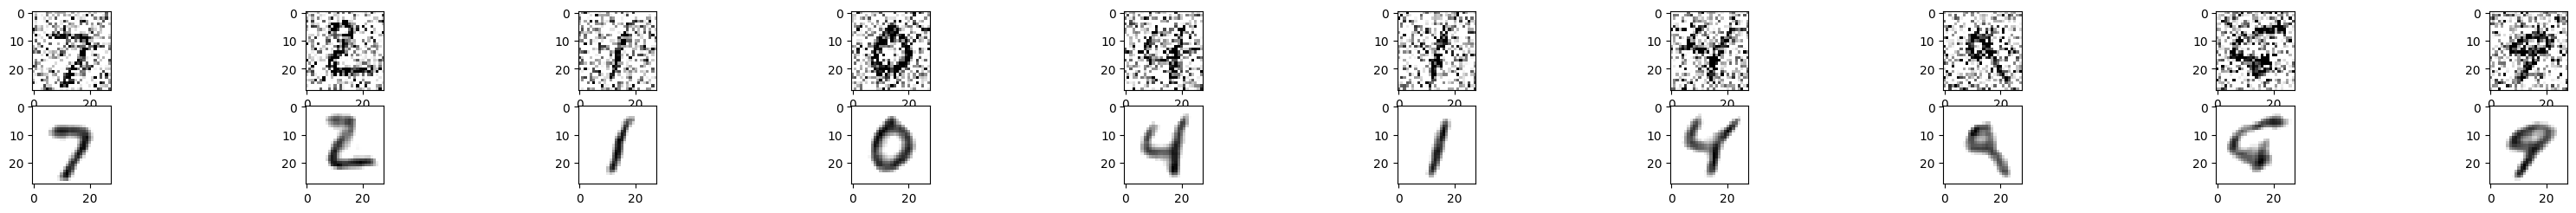

In [29]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # Display noisy image
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='binary')
    

    # Display reconstruction image
    ax = plt.subplot(3, 10, i + 1 + 10)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap='binary')
    
plt.show()